In [1]:
import quantstats as qs
import yfinance as yf
import pandas as pd
import pandas_ta as ta
import numpy as np
import seaborn as sns
import utils as utl
import html_evaluation_portfolio as hep
import matplotlib.pyplot as plt
from IPython.display import display
from matplotlib.colors import LinearSegmentedColormap
from quantstats.stats import *
from quantstats._plotting.wrappers import distribution

In [2]:
list_securities = ['SSO','UBT', 'UST', 'UGL']
window = 30 #days

#main
data = hep.create_dataframe(list_securities)
#print(data)
data_perc = hep.perc_df(data)
inv_volat_data = hep.df_inverse_volatility(data_perc, window)
data_wheighted = hep.df_wheighted(inv_volat_data)
data_earnings = hep.df_earnings(data_wheighted, data_perc)
data_earn_eq_weight = hep.df_earnings_equal_weight(data_perc)
data_earnings.dropna(inplace = True)
data_earn_eq_weight.dropna(inplace = True)
#print(data_earn_eq_weight)

In [3]:
#param
figsize=(10, 5)
fontname = 'Arial'
annot_size=10
square = False
cbar = False
cmap = LinearSegmentedColormap.from_list('RedGreen', ['crimson', 'gold', 'lime'])
eoy=False
compounded=True

           JAN       FEB       MAR       APR       MAY       JUN       JUL  \
2010  1.000000  1.000000  0.983731  1.039765  1.073509  1.122284  1.130334   
2011  0.982762  1.028234  1.033094  1.103655  1.128956  1.099822  1.177826   
2012  1.051323  1.050999  1.033648  1.067745  1.080687  1.089700  1.124525   
2013  0.988144  0.987795  1.005710  1.023858  0.965158  0.897226  0.922407   
2014  1.046345  1.088170  1.080450  1.101430  1.130575  1.158510  1.143241   
2015  1.093572  1.046326  1.038641  1.025862  1.018476  0.975754  0.974001   
2016  1.054384  1.120907  1.140417  1.148624  1.140121  1.233076  1.270155   
2017  1.030996  1.076779  1.074754  1.098186  1.118419  1.111647  1.130054   
2018  1.007630  0.967084  0.986771  0.959110  0.969386  0.954049  0.947269   
2019  1.029229  1.022322  1.067262  1.064749  1.105205  1.173946  1.178241   
2020  1.071453  1.110945  1.157223  1.226600  1.238649  1.259741  1.340360   
2021  0.967213  0.906988  0.877224  0.920913  0.946108  0.959733

,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,YEAR
2010,0.000000,0.000000,-1.626862,5.696019,3.245405,4.543431,0.717358,7.219358,5.106903,1.850910,-0.951101,0.492040,29.139064
2011,-1.723771,4.626964,0.472638,6.830086,2.292456,-2.580592,7.092352,12.319622,1.009451,2.280351,1.448019,-0.396063,38.105498
2012,5.132272,-0.030802,-1.650879,3.298652,1.212154,0.833969,3.195814,1.931710,1.588318,-2.604082,1.157995,-2.305719,12.081053
2013,-1.185632,-0.035299,1.813613,1.804574,-5.733260,-7.038441,2.806572,-1.982777,2.062150,3.212517,-2.251462,-2.493765,-9.225303
2014,4.634498,3.997263,-0.709466,1.941767,2.646085,2.470911,-1.318005,4.979370,-4.617245,1.047266,3.414960,1.330203,21.215563
2015,9.357249,-4.320340,-0.734562,-1.230307,-0.720013,-4.194640,-0.179675,-1.418030,0.763099,2.296463,-3.129294,-1.354197,-5.421991
2016,5.438383,6.309237,1.740475,0.719657,-0.740238,8.153098,3.007046,-2.435675,-0.219127,-4.744100,-7.698823,-0.029508,8.684137
2017,3.099594,4.440711,-0.188122,2.180223,1.842425,-0.605475,1.655808,3.854177,-2.354724,1.085586,1.291579,1.926573,19.598145
2018,0.763041,-4.023931,2.035711,-2.803145,1.071405,-1.582181,-0.710674,1.565832,-2.241784,-3.194110,2.243325,5.455845,-1.829379
2019,2.922878,-0.671107,4.395922,-0.235457,3.799596,6.219692,0.365934,9.038471,-3.078725,1.440515,-0.845117,1.694943,27.367339


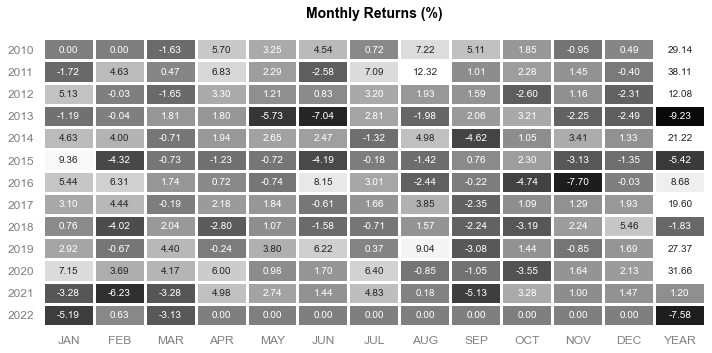

In [44]:
#crate the returns table plus the return over the year

fig, ax = plt.subplots(figsize=figsize)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

fig.set_facecolor('white')
ax.set_facecolor('white')

ax.set_title('Monthly Returns (%)\n', fontsize=14, y=.995,
             fontname=fontname, fontweight='bold', color='black')

returns = monthly_returns(data_earnings['Tot'], eoy=eoy,compounded=compounded) * 100

#returns['YEAR'] = returns.replace(0,1).cumprod(axis=1)['DEC']

#print(returns.div(100).add(1).cumprod(axis = 1)) #replace(0,1).cumprod(axis=1)['DEC']
returns['YEAR'] = returns.div(100).add(1).cumprod(axis = 1)['DEC']
returns['YEAR'] = returns['YEAR'].sub(1).mul(100)

display(returns)

ax = sns.heatmap(returns, ax=ax, annot=True, center=0,
                annot_kws={"size": annot_size}, vmax = 10,
                fmt="0.2f", linewidths=2,
                square=square, cbar=cbar, cmap = 'gray',
                cbar_kws={'format': '%.0f%%'})

ax.tick_params(colors="#808080")
plt.xticks(rotation=0, fontsize=annot_size*1.2)
plt.yticks(rotation=0, fontsize=annot_size*1.2)
plt.subplots_adjust(hspace=0, bottom=0, top=1)
fig.tight_layout(w_pad=0, h_pad=0)
plt.savefig('./img/table_montly_returns.png')

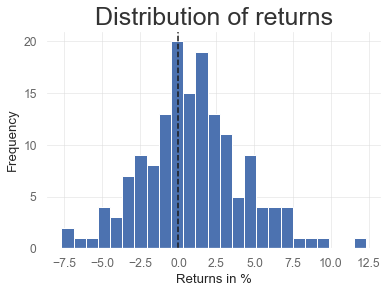

In [5]:
returns = monthly_returns(data_earnings['Tot'], eoy=eoy,compounded=compounded) * 100

series = pd.Series(dtype = 'float64')
for column in returns.columns:
    series = pd.concat([series,returns[column]])
#distribution(returns)
ax = series.plot.hist(bins = 25)
#ax.set_title("my title")
ax.set_title('Distribution of returns', size = 25)
ax.axvline(0, color='k', linestyle='--')
ax.set_xlabel("Returns in %")
ax.set_ylabel("Frequency")
fig = ax.get_figure()
fig.savefig('./img/distribution_returns.png')

In [29]:
statistics = pd.DataFrame(columns = ['index', 'value'])

statistics.loc[0] = ['Annualised return', utl.annualized_return(data_earnings['Tot'])]
statistics.loc[1] = ['Annualised volatility', utl.annualised_volatility(data_earnings['Tot'])]
statistics.loc[2] = ['Sharpe ratio', sharpe(data_earnings['Tot'])]
statistics.loc[3] = ['Sortino ratio', sortino(data_earnings['Tot'])]
statistics.loc[4] = ['Adjusted sortino', adjusted_sortino(data_earnings['Tot'])] 
statistics.loc[5] = ['Skew', skew(data_earnings['Tot'])] 
statistics.loc[6] = ['Kurtosis', data_earnings['Tot'].kurt()] 
statistics.loc[7] = ['Max drawdown', max_drawdown(data_earnings['Tot'])] 
statistics.loc[8] = ['GPR', gain_to_pain_ratio(data_earnings['Tot'])] 
statistics.loc[9] = ['Calmar ratio', calmar(data_earnings['Tot'])] 
statistics.loc[10] = ['Pay-off ratio', payoff_ratio(data_earnings['Tot'])] 

# Annualised return (At top)
# Annualizwed volatility (At top)

statistics

,index,value
0,Annualised return,0.125875
1,Annualised volatility,0.118451
2,Sharpe ratio,1.063028
3,Sortino ratio,1.523732
4,Adjusted sortino,1.077441
5,Skew,-0.300158
6,Kurtosis,3.011601
7,Max drawdown,-0.167938
8,GPR,0.198433
9,Calmar ratio,0.751036


In [82]:
#Try
htmlfile = open('all_weather_report.html','w')

htmlfile.write('<img src = "' + './img/distribution_returns.png' + '" alt ="cfg">\n')

htmlfile.close()

In [7]:
from quantstats._plotting.wrappers import drawdowns_periods, drawdown

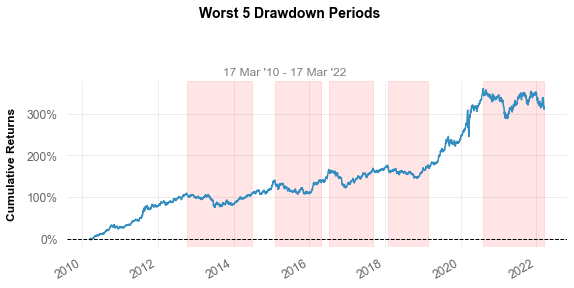

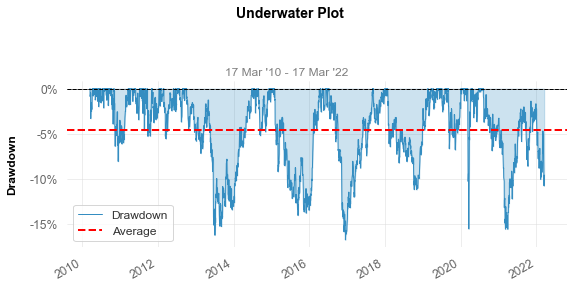

In [8]:
drawdowns_periods(data_earnings['Tot'], figsize=(8, 4), savefig =  './img/drawdowns_period.png' )
drawdown(data_earnings['Tot'], figsize=(8, 4), savefig =  './img/under_water_plot.png')